### Check for presence of GPU
---

In [1]:
!nvidia-smi

Fri Jun 13 15:16:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.02                 Driver Version: 576.02         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   40C    P8              6W /   58W |     102MiB /   4096MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
import torch
print(torch.cuda.is_available())       # Should return True
print(torch.cuda.get_device_name(0))   # Should return your GPU name

True
NVIDIA GeForce RTX 3050 Laptop GPU


### Checking current version
---

In [6]:
import torch
print(torch.__version__)

2.5.1


### Splitting train and test image data manually
---

In [17]:
# Split between train and val folders
from pathlib import Path
import random
import os
import sys
import shutil
import argparse


data_path = r"RawDataset" 
train_percent = 0.8 # control partition

# Check for valid entries
if not os.path.isdir(data_path):
   print('Directory specified by --datapath not found. Verify the path is correct (and uses double back slashes if on Windows) and try again.')
   sys.exit(0)
if train_percent < .01 or train_percent > 0.99:
   print('Invalid entry for train_pct. Please enter a number between .01 and .99.')
   sys.exit(0)
val_percent = 1 - train_percent

# Define path to input dataset 
input_image_path = os.path.join(data_path,'images')
input_label_path = os.path.join(data_path,'labels')

# Define paths to image and annotation folders
cwd = os.getcwd()
train_img_path = os.path.join(cwd,'data/train/images')
train_txt_path = os.path.join(cwd,'data/train/labels')
val_img_path = os.path.join(cwd,'data/validation/images')
val_txt_path = os.path.join(cwd,'data/validation/labels')

# Create folders if they don't already exist
for dir_path in [train_img_path, train_txt_path, val_img_path, val_txt_path]:
   if not os.path.exists(dir_path):
      os.makedirs(dir_path)
      print(f'Created folder at {dir_path}.')


# Get list of all images and annotation files
img_file_list = [path for path in Path(input_image_path).rglob('*')]
txt_file_list = [path for path in Path(input_label_path).rglob('*')]

print(f'Number of image files: {len(img_file_list)}')
print(f'Number of annotation files: {len(txt_file_list)}')

# Determine number of files to move to each folder
file_num = len(img_file_list)
train_num = int(file_num*train_percent)
val_num = file_num - train_num
print('Images moving to train: %d' % train_num)
print('Images moving to validation: %d' % val_num)

# Select image files + label files randomly and copy them to train or val folders
for i, set_num in enumerate([train_num, val_num]):
    for _ in range(set_num):
        img_path = random.choice(img_file_list)
        img_fn = img_path.name
        base_fn = img_path.stem
        txt_fn = base_fn + '.txt'
        txt_path = os.path.join(input_label_path, txt_fn)

        if i == 0:  # Copy to train folders
            new_img_path, new_txt_path = train_img_path, train_txt_path
        else:       # Copy to val folders
            new_img_path, new_txt_path = val_img_path, val_txt_path

        print(f"Copying from {img_path} to {os.path.join(new_img_path, img_fn)}")

        try:
            shutil.copy(img_path, os.path.join(new_img_path, img_fn))
            if os.path.exists(txt_path):
                shutil.copy(txt_path, os.path.join(new_txt_path, txt_fn))
        except PermissionError as e:
            print(f"Permission error copying {img_path} or {txt_path}: {e}")
        except Exception as e:
            print(f"Error copying {img_path} or {txt_path}: {e}")

        img_file_list.remove(img_path)

Created folder at C:\Users\iamah\AI STUFF\Hackathon 2\data/train/images.
Created folder at C:\Users\iamah\AI STUFF\Hackathon 2\data/train/labels.
Created folder at C:\Users\iamah\AI STUFF\Hackathon 2\data/validation/images.
Created folder at C:\Users\iamah\AI STUFF\Hackathon 2\data/validation/labels.
Number of image files: 95
Number of annotation files: 95
Images moving to train: 76
Images moving to validation: 19
Copying from RawDataset\images\46ea373a-aug_Media_10_0_2346.png to C:\Users\iamah\AI STUFF\Hackathon 2\data/train/images\46ea373a-aug_Media_10_0_2346.png
Copying from RawDataset\images\d2412a4e-aug_Media_14_0_7645.png to C:\Users\iamah\AI STUFF\Hackathon 2\data/train/images\d2412a4e-aug_Media_14_0_7645.png
Copying from RawDataset\images\7c23b4b0-aug_Media_13_0_5683.png to C:\Users\iamah\AI STUFF\Hackathon 2\data/train/images\7c23b4b0-aug_Media_13_0_5683.png
Copying from RawDataset\images\9df961da-aug_Media_2_0_7525.png to C:\Users\iamah\AI STUFF\Hackathon 2\data/train/images\

### Installing Library to use for Yolo Model Training
---

In [10]:
!pip install ultralytics

  Using cached ultralytics-8.3.154-py3-none-any.whl.metadata (37 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)
Using cached ultralytics-8.3.154-py3-none-any.whl (1.0 MB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 62.4 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta

### Create data yaml for Yolo
---

* YOLO (You Only Look Once) is chosen because it is a real-time object detection system that balances speed and accuracy, making it ideal for practical applications. It processes images in a single pass, enabling fast inference suitable for edge devices, video streams, and production environments. Its flexible architecture supports custom training, transfer learning, and fast deployment.

#### Why?: Tells YOLO where your dataset is located and how many classes it needs to learn.

In [18]:
import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):
    if not os.path.exists(path_to_classes_txt):
        print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
        return

    with open(path_to_classes_txt, 'r') as f:
        classes = [line.strip() for line in f if line.strip()]
    number_of_classes = len(classes)

    data = {
        'path': os.path.abspath('./data'),  # Dynamically get absolute path
        'train': 'train/images',
        'val': 'validation/images',
        'nc': number_of_classes,
        'names': classes
    }

    with open(path_to_data_yaml, 'w') as f:
        yaml.dump(data, f, sort_keys=False)
    print(f'Created config file at {path_to_data_yaml}')

if os.path.exists('./data.yaml'):
    with open('./data.yaml', 'r') as f:
        print(f.read())
else:
    print("data.yaml was not created. Check for errors in the create_data_yaml function.")

# Define paths (adjust paths to your local environment)
path_to_classes_txt = './RawDataset/classes.txt'
path_to_data_yaml = './data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
with open(path_to_data_yaml, 'r') as f:
    print(f.read())

data.yaml was not created. Check for errors in the create_data_yaml function.
Created config file at ./data.yaml

File contents:

path: C:\Users\iamah\AI STUFF\Hackathon 2\data
train: train/images
val: validation/images
nc: 1
names:
- medication



### Training of Pretrained Yolo-11 Model
---



In [20]:
### runs yolo command line to train object detection model using yolo 11 pretrained model on dataset in data.yml
#### images are resized and trained through 5 training cycles

!yolo task=detect mode=train model=yolo11s.pt data="data.yaml" epochs=5 imgsz=640

Ultralytics 8.3.154  Python-3.10.18 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=


train: Scanning C:\Users\iamah\AI STUFF\Hackathon 2\data\train\labels...:   0%|          | 0/76 [00:00<?, ?it/s]
train: Scanning C:\Users\iamah\AI STUFF\Hackathon 2\data\train\labels... 44 images, 0 backgrounds, 0 corrupt:  58%|#####7    | 44/76 [00:00<00:00, 396.17it/s]
train: Scanning C:\Users\iamah\AI STUFF\Hackathon 2\data\train\labels... 76 images, 0 backgrounds, 0 corrupt: 100%|##########| 76/76 [00:00<00:00, 451.05it/s]

val: Scanning C:\Users\iamah\AI STUFF\Hackathon 2\data\validation\labels...:   0%|          | 0/19 [00:00<?, ?it/s]
val: Scanning C:\Users\iamah\AI STUFF\Hackathon 2\data\validation\labels... 19 images, 0 backgrounds, 0 corrupt: 100%|##########| 19/19 [00:00<00:00, 317.32it/s]

  0%|          | 0/5 [00:00<?, ?it/s]
        1/5      3.88G       2.21      8.668       2.36         35        640:   0%|          | 0/5 [00:03<?, ?it/s]
        1/5      3.88G       2.21      8.668       2.36         35        640:  20%|##        | 1/5 [00:03<00:15,  3.93s/it]
        

### Uses Validation to check model performance
---

In [22]:
### runs yolo command line for object detection task to evaluate model performance on validation with a specific model

!yolo task=detect mode=val model=runs/train2/weights/best.pt data="data.yaml"

Ultralytics 8.3.154  Python-3.10.18 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 2453.2249.2 MB/s, size: 1499.7 KB)
                   all         19         19      0.973      0.632      0.751      0.531
Speed: 2.4ms preprocess, 23.2ms inference, 0.0ms loss, 17.7ms postprocess per image
Results saved to runs\detect\val
 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning C:\Users\iamah\AI STUFF\Hackathon 2\data\validation\labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|##########| 19/19 [00:00<?, ?it/s]
val: Scanning C:\Users\iamah\AI STUFF\Hackathon 2\data\validation\labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|##########| 19/19 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|#####     | 1/2 [00:00<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|##########| 2/2 [00:01<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|##########| 2/2 [00:01<00:00,  1.68it/s]


### Saving Model evaluation results
---

In [24]:
### loads pretrained model, then run prediction on all images and save the results to a folder

!yolo task=detect mode=predict model=best.pt source="data/validation/images" save=True

Ultralytics 8.3.154  Python-3.10.18 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/19 C:\Users\iamah\AI STUFF\Hackathon 2\data\validation\images\0e9db172-aug_Media_15_0_3258.png: 640x480 1 medication, 516.3ms
image 2/19 C:\Users\iamah\AI STUFF\Hackathon 2\data\validation\images\1b261443-aug_Media_5_0_8922.png: 640x480 1 medication, 23.1ms
image 3/19 C:\Users\iamah\AI STUFF\Hackathon 2\data\validation\images\23bad1b0-aug_Media_16_0_1499.png: 640x480 (no detections), 12.1ms
image 4/19 C:\Users\iamah\AI STUFF\Hackathon 2\data\validation\images\242960fd-aug_Media_9_0_1621.png: 480x640 1 medication, 86.9ms
image 5/19 C:\Users\iamah\AI STUFF\Hackathon 2\data\validation\images\32a8539c-aug_medication_test_0_7853.png: 416x640 1 medication, 247.5ms
image 6/19 C:\Users\iamah\AI STUFF\Hackathon 2\data\validation\images\3f7e811d-aug_Media_7_0_3280.png: 640x480 2 medications, 25.7ms
image 

### Showing results of evaluation + bounding box images
---

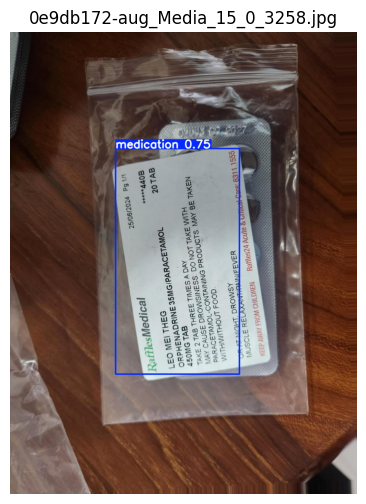

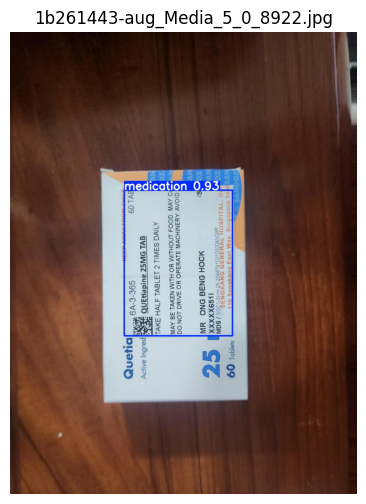

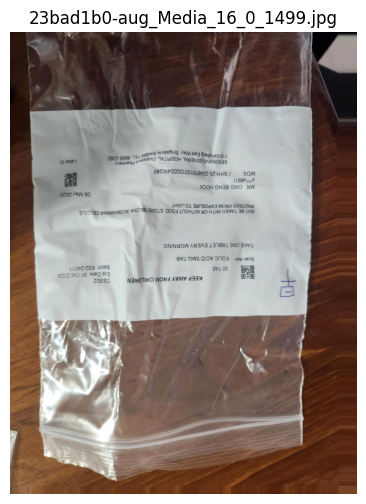

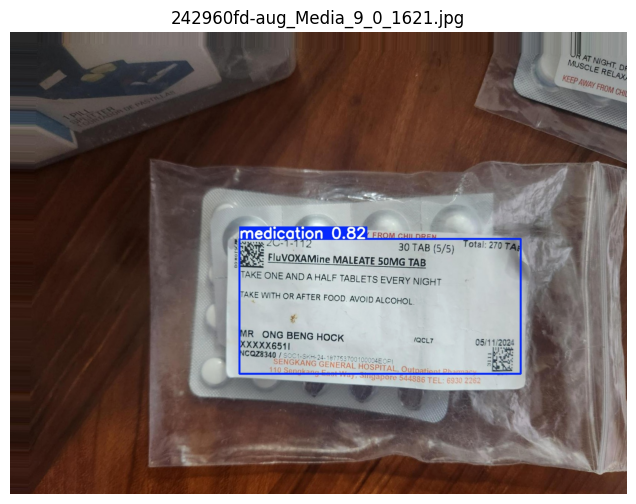

In [12]:
import cv2
import matplotlib.pyplot as plt
import os

output_path = r'C:\Users\iamah\AI STUFF\Hackathon 2\runs\detect\predict'
images = os.listdir(output_path)

for img_name in images[:5]:  # Show first 5 images 
    img_path = os.path.join(output_path, img_name) # combine to show img
    img = cv2.imread(img_path)
    if img is None:
        print(f"Warning: Could not load image {img_name}, skipping...")
        continue  # skip to next if image failed to load

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')
    plt.show()

#### Analysis: Predictions works on some images, but not all images in validation are detected, however, accuracy and bounding box detected is still good

### Show evaluation of visualisations compared to metrics
---

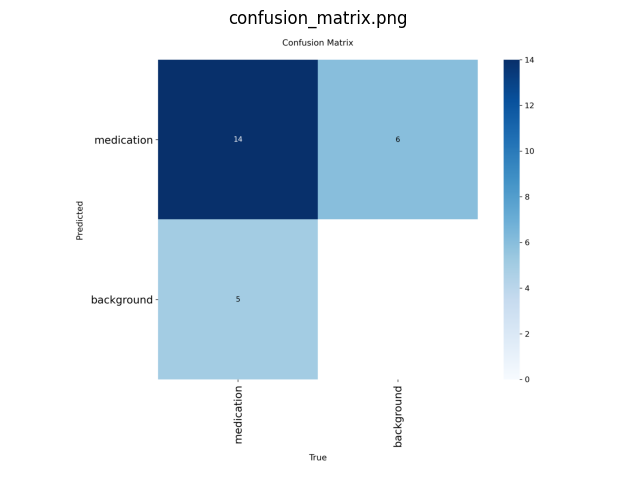

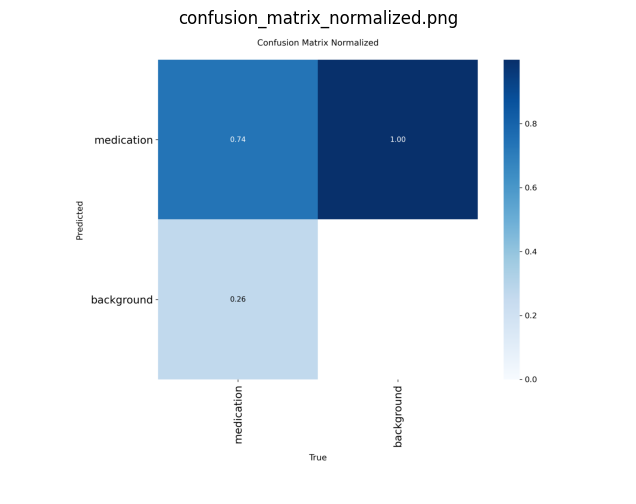

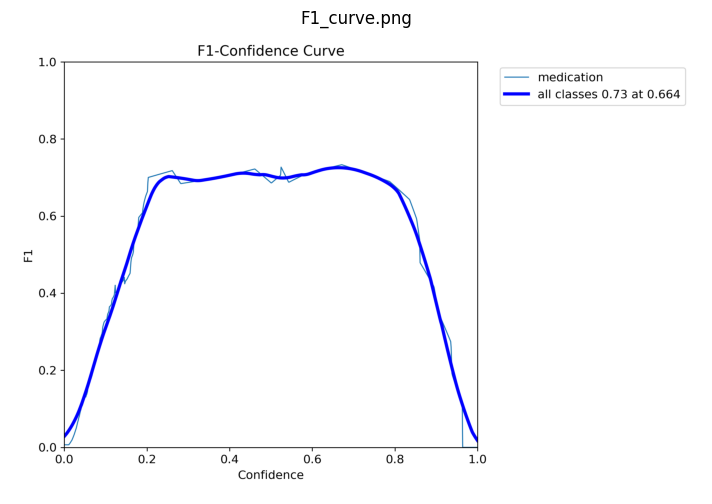

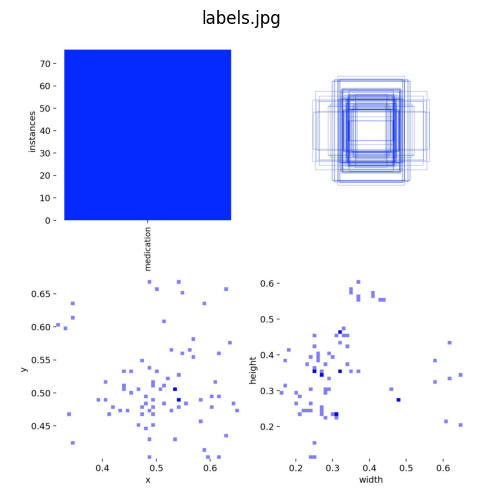

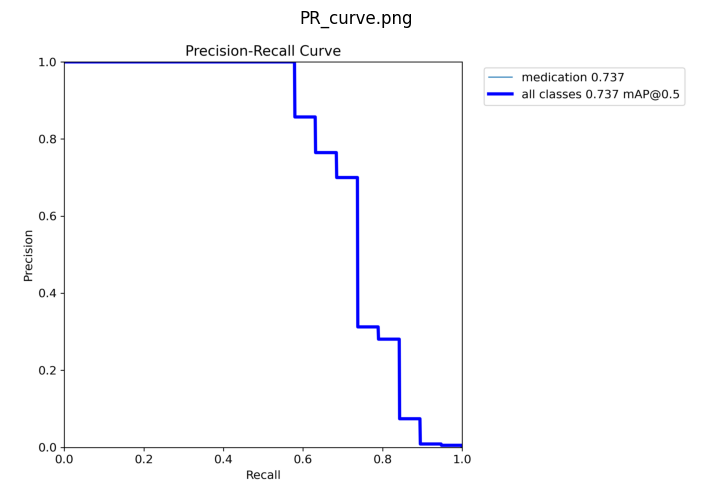

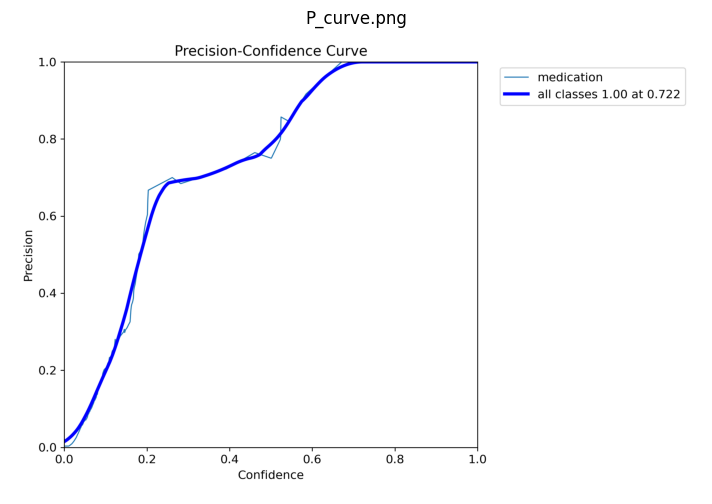

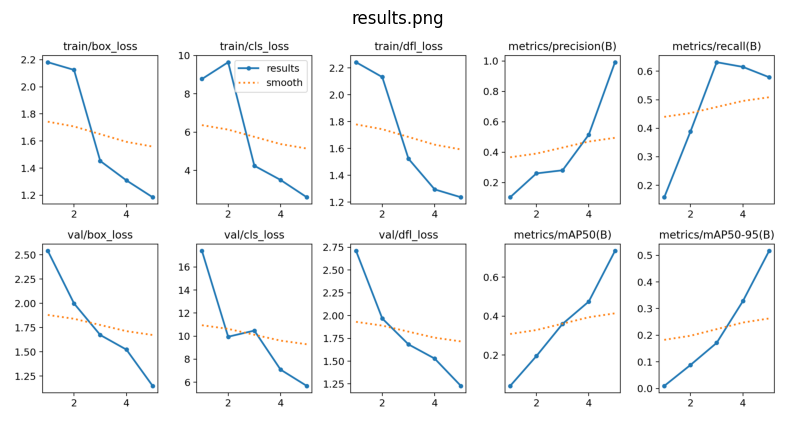

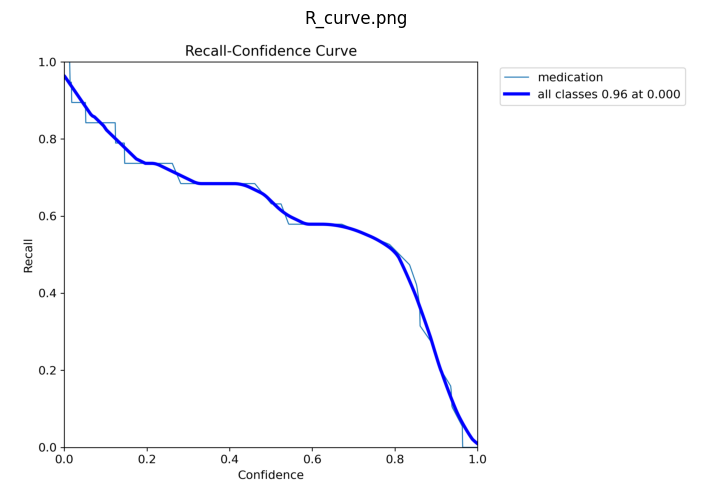

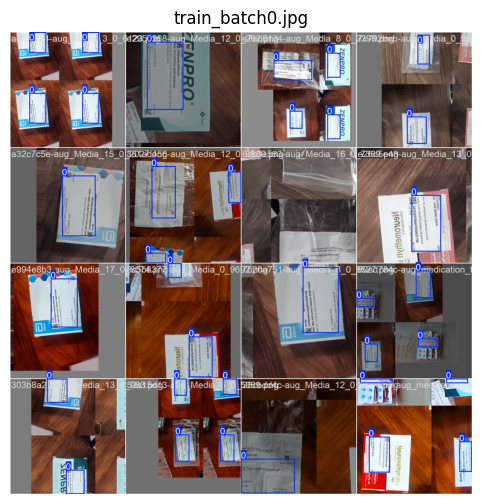

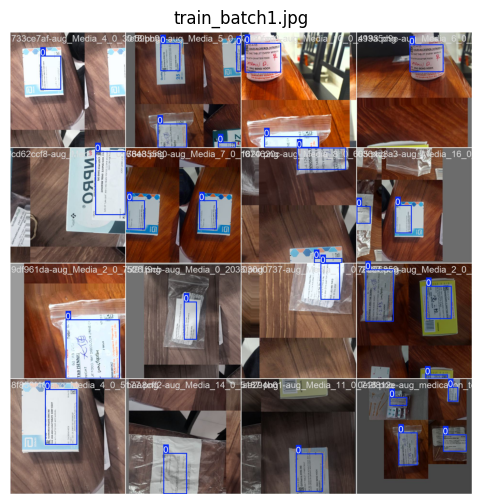

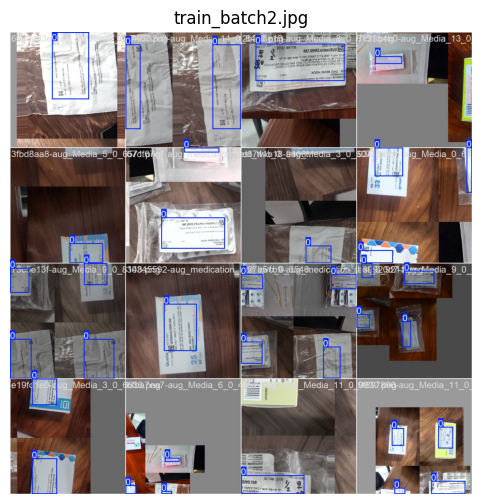

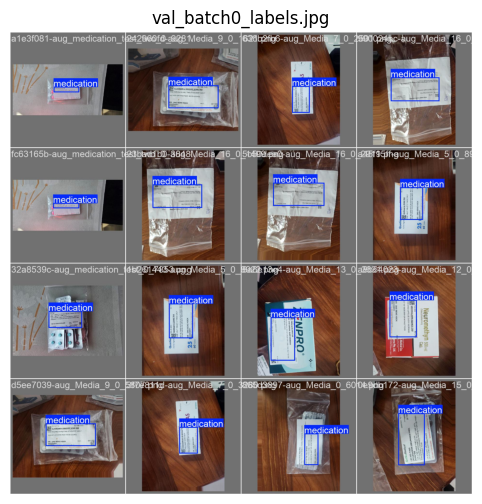

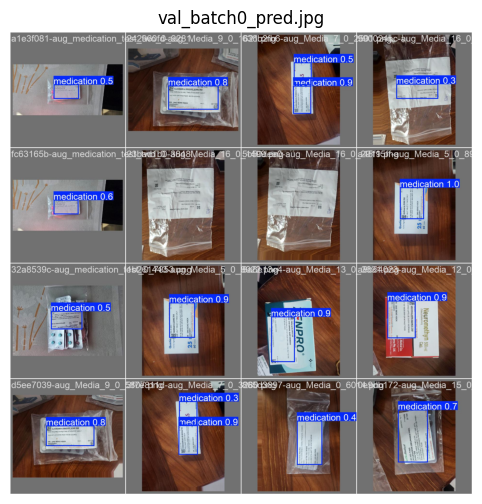

In [13]:
import cv2
import matplotlib.pyplot as plt
import os

output_path = r'C:\Users\iamah\AI STUFF\Hackathon 2\runs\detect\train2'
images = os.listdir(output_path)

for img_name in images:  # Show first 5 images 
    img_path = os.path.join(output_path, img_name) # combine to show img
    img = cv2.imread(img_path)
    if img is None:
        print(f"Warning: Could not load image {img_name}, skipping...")
        continue  # skip to next if image failed to load

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')
    plt.show()

#### Analysis: Precision is decently well, around 0.73, current base model is good, but can be better with more fine tuning and model training

In [ ]:
#### Sorry, we did not do fine-tuning as one of the members doing this part fell sick and couldnt do this part